In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import sympy

In [ ]:
def scalar_mult(u, v):
  sum = 0
  for i in range(0, len(v)):
    sum += u[i]*v[i]
  return sum

In [ ]:
def vmul(u, v):
  result = np.array([[0., 0.], [0., 0.]])
  for i in range(2):
    for j in range(2):
      result[i][j] = u[i][0] * v[j]
  return result


In [ ]:
def v(H, W):
  v = np.array([0., 0.])
  for i in range(0, 2):
    for j in range(0, 2):
     v[i] +=  (H[i][j]) * (W[j])
  return v

In [ ]:

g, o = 0.49, 0.3

func = 1 # функция: 1 - Розенброка, 2 - квадратичная
if func == 1:
  alpha = 1
  X = np.array([-1, -2])
  F = lambda x, y: alpha * (x ** 2 - y) ** 2 + (x - 1) ** 2 #Ф-я Розенброка
if func == 2:
  X = np.array([np.sqrt(10), 0])
  F = lambda x, y: 11 * x ** 2 + 3 * y ** 2 + 6 * x * y - 2 * np.sqrt(10) * (x - 3 * y) - 22

f = lambda X: F(X[0], X[1])
w = lambda X: np.array(-grad_F(X[0], X[1]))

x_, y_ = sympy.Symbol('x'), sympy.Symbol('y')
grad_F = sympy.tensor.array.derive_by_array(F(x_, y_), (x_, y_))
grad_F = sympy.lambdify((x_, y_), grad_F, 'numpy')


eps = 1e-3
#счетчики
iterations = 0 #итераций
counter_F = 0 #вычисленных функций
counter_W = 0 #вычисленных антиградиентов
counter_A = 0 #вычисленных матриц A
method = 3 #метод: 1 - ДФП, 2 - БПГШ, 3 - Пауэлла, 4 - Мак-Кормика

data = {f(X)}
counter_F += 1
X_line = np.array([X[0]])
Y_line = np.array([X[1]])

A = np.eye(2)
W = w(X)
counter_W += 1
Warr = np.array([ ])
iteration = np.array([ ])
while (np.linalg.norm(W) > eps):
  iterations += 1
  kappa = 1
  p = v(A, W)
  X_n = X + kappa * p
  while (f(X) - f(X_n)) < (o * kappa * scalar_mult(W, p)):
    kappa = kappa * g
    X_n = X + kappa * p
    counter_F += 1
  Xprev = X
  Wprev = W
  X = X_n
  W = w(X)
  iteration = np.append(iteration, iterations)
  Warr = np.append(Warr, np.log(np.linalg.norm(W)))
  counter_W += 1
  delta_X = X - Xprev
  #print('X', delta_X)
  delta_X_T = delta_X.reshape(-1, 1)
  delta_W = W - Wprev
  #print('W', delta_W)
  delta_W_T = delta_W.reshape(-1, 1)
  if (delta_X[0] == 0 and delta_X[1] == 0) or (delta_W[0] == 0 and delta_W[1] == 0) or iterations % 5 == 0:
    A = np.eye(2)
  else:
    if method == 1:
      delta_A = -(vmul(delta_X_T, delta_X) / (scalar_mult(delta_W, delta_X))) - ((vmul(A.dot(delta_W_T), delta_W)).dot(A.transpose()) / (scalar_mult(v(A, delta_W), delta_W)))
      method_name = " Метод ДФП "
      A = A + delta_A
      counter_A += 1
    if method == 2:
      r = (v(A, delta_W) / (scalar_mult(v(A, delta_W), delta_W))) - (delta_X / (scalar_mult(delta_W, delta_X)))
      r_T = r.reshape(-1, 1)
      delta_A = -(vmul(delta_X_T, delta_X) / (scalar_mult(delta_W, delta_X))) - ((vmul(A.dot(delta_W_T), delta_W)).dot(A.transpose()) / (scalar_mult(v(A, delta_W), delta_W))) + vmul((scalar_mult(v(A, delta_W), delta_W) * r_T), r)
      method_name = " Метод БПГШ "
      A = A + delta_A
      counter_A += 1
    if method == 3:
      delta_X = delta_X + v(A, delta_W)
      delta_X_T = delta_X.reshape(-1, 1)
      delta_A = -(vmul(delta_X_T, delta_X)) / (scalar_mult(delta_W, delta_X))
      method_name = " Метод Пауэлла "
      A = A + delta_A
      counter_A += 1
    if method == 4:
      delta_A = -((vmul(delta_X_T, delta_X)) / (scalar_mult(delta_W, delta_X))) - ((vmul((A.dot(delta_W_T)), delta_X)) / (scalar_mult(delta_X, delta_W)))
      method_name = " Метод Мак-Кормика "
      A = A + delta_A
      counter_A += 1

  X_line = np.append(X_line, X[0])
  Y_line = np.append(Y_line, X[1])
  data.add(f(X))
  #print(np.linalg.norm(W))
X_min = X

==================== Метод Пауэлла ====================
eps =  0.001
x* =  0.9999572763025089 0.9998161514360033
f(x*) =  1.1508463620174328e-08
iterations =  13
counter_F =  62
counter_W =  14
counter_A =  11


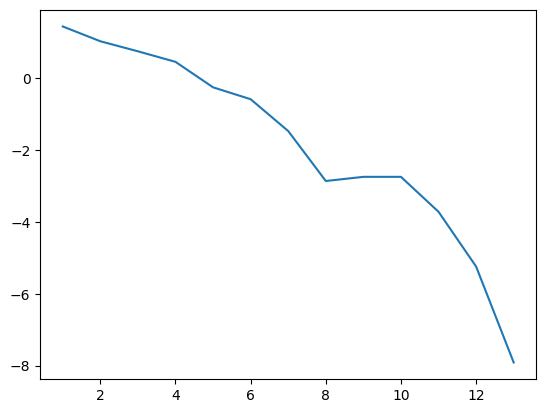

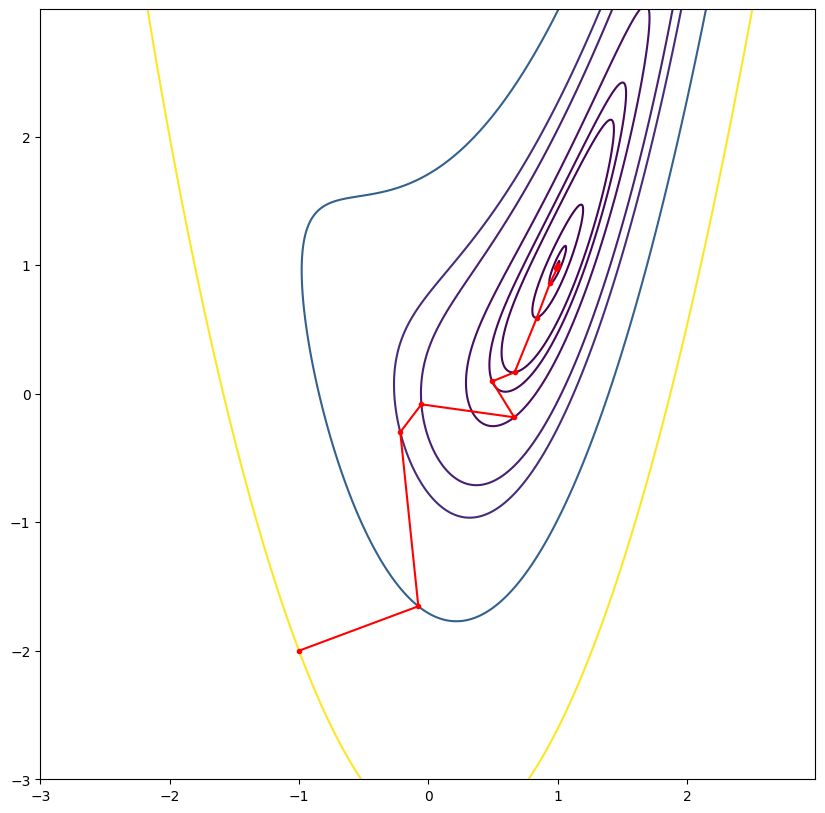

In [ ]:
print("====================" + method_name + "====================")
print("eps = ", eps)
print("x* = ", X_min[0], X_min[1])
print("f(x*) = ", F(X_min[0], X_min[1]))
print("iterations = ", iterations)
print("counter_F = ", counter_F)
print("counter_W = ", counter_W)
print("counter_A = ", counter_A)


if func == 1:
  x_space = np.arange(-3, 3, 0.01)
  y_space = np.arange(-3, 3, 0.01)
if func == 2:
  x_space = np.arange(-10, 10, 0.01)
  y_space = np.arange(-10, 10, 0.01)

xgrid, ygrid = np.meshgrid(x_space, y_space)
z = ((xgrid**2-ygrid)**2)+(xgrid-1)**2

plt.plot(iteration, Warr)

fig = plt.figure(figsize=(10, 10))
axes = fig.add_subplot()
axes.contour(xgrid, ygrid, z, sorted(data))
plt.plot(X_line, Y_line, color = "r", marker = ".")



In [ ]:
plt.plot(Warr, iteration)